# Problem Statement- Baseball Case Study

### Problem Statement:

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins. 

-- Input features: Runs, At Bats, Hits, Doubles, Triples, Homeruns, Walks, Strikeouts, Stolen Bases, Runs Allowed, Earned Runs, Earned Run Average (ERA), Shutouts, Saves, Complete Games and Errors

-- Output: Number of predicted wins (W)

# Importing Necessary Libraries

In [210]:
print("######################################")
print("       Import Key Packages            ")
print("######################################")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import statsmodels as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn import preprocessing
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
warnings.filterwarnings('ignore')
from scipy import stats
import statsmodels.api as sm


######################################
       Import Key Packages            
######################################


# Checking the Dataset overview

In [211]:
df = pd.read_csv("baseball.csv")

In [212]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


# Dataset Information

In [213]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


## Observation:

We could see that the features/column/fields and its data type, along with Null count

Earned Run Average is float type and all other columns are integer in the given data set
Let go and see the given data set file

# Checking Null Values

In [214]:
#columns with null values
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

Observation- we can see that no null value presen in the dataset.

# Summary of Statistics

In [215]:
display(df.describe())

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Observation- We can say that Completed Games(CG) and Shoutouts(SHO) is discrete data and other columns are continious data

In [216]:
df[df['CG'] == 0]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
22,71,613,5463,1420,236,40,120,375,1150,112,678,638,4.02,0,12,35,77


In [217]:
df.head(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


 # Making DataFrame for Nominal data

In [218]:
df_visualization_nominal = df[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','CG','SHO','SV','E']].copy()

In [219]:
df_visualization_nominal.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


# Visualization of Data

In [220]:
import seaborn as sns

### Discrete data visualization

1     7
2     4
7     4
0     3
3     3
5     3
6     3
4     2
11    1
Name: CG, dtype: int64


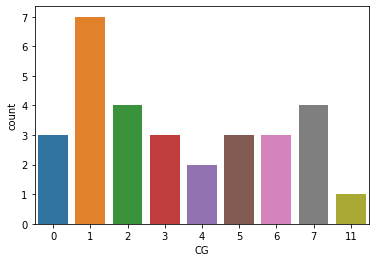

In [221]:
ax = sns.countplot(x="CG",data=df_visualization_nominal)
print(df_visualization_nominal["CG"].value_counts())

Observation- we can see that we have complete game in range 0-7 and 11.

Most complete game count is 1

Least complele game count is 11

Other complete game count ranges between 2-4

12    7
10    5
13    3
4     2
7     2
8     2
9     2
15    2
21    2
6     1
14    1
18    1
Name: SHO, dtype: int64


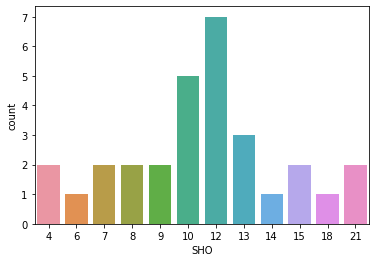

In [222]:
ax = sns.countplot(x="SHO",data=df_visualization_nominal)
print(df_visualization_nominal["SHO"].value_counts())

Observation- we can see that shoutout count is in range 4,6,7,8,9,10,12,13,14,15,18,21

Most Shoutout count is 7 which is for 12 shoutouts

Least Shoutout count is 1 which is for 6,14 and 18 shoutouts

Other complete game count ranges between 2-5

# Visualization of ordinal Data

In [223]:
df_visualization_ordinal = df[["CG","W"]].copy
df_visualization_ordinal2 = df[["SHO","W"]].copy

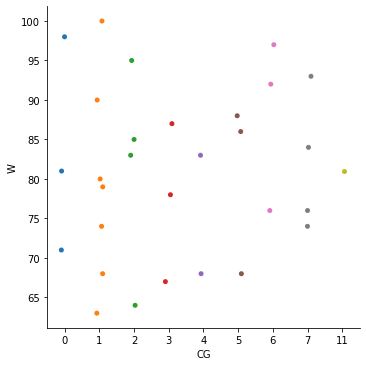

In [224]:
sns.catplot(x="CG", y= "W", data=df)

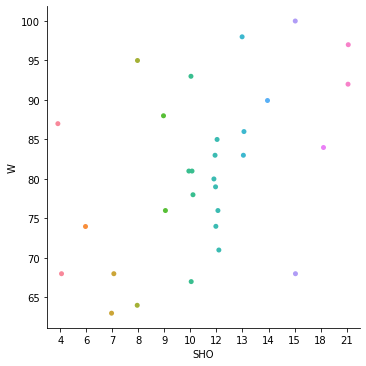

In [225]:
sns.catplot(x="SHO", y= "W", data=df)

Observation- Data is not distributed evenly

# Checking the distribution of continious value 

In [226]:
# Correlation of the columns with the target columns :

In [227]:
df_visualization_continious= df[['W','R','AB','H','2B','3B','HR','BB','SO','SB','RA','ER','ERA','SV','E']].copy()

<AxesSubplot:ylabel='R'>

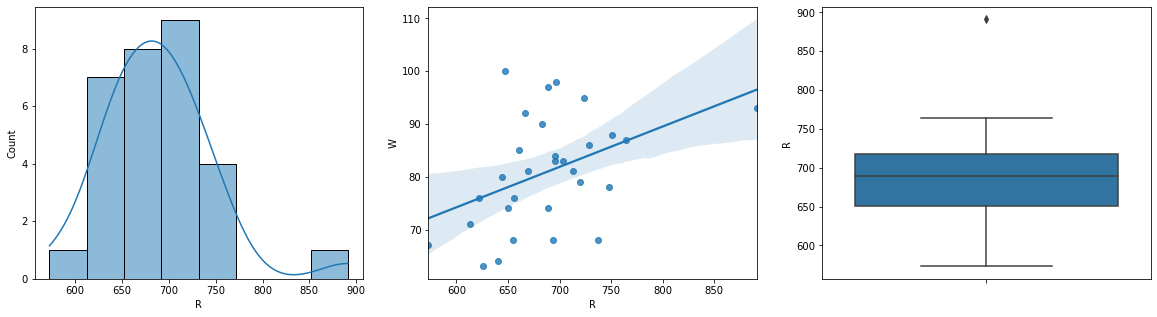

In [228]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='R',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='R',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='R',data=df)

Observation- Runs and Win is weak positive co-related and we can see a outlier present at 900 and distribution is right skewed

<AxesSubplot:ylabel='AB'>

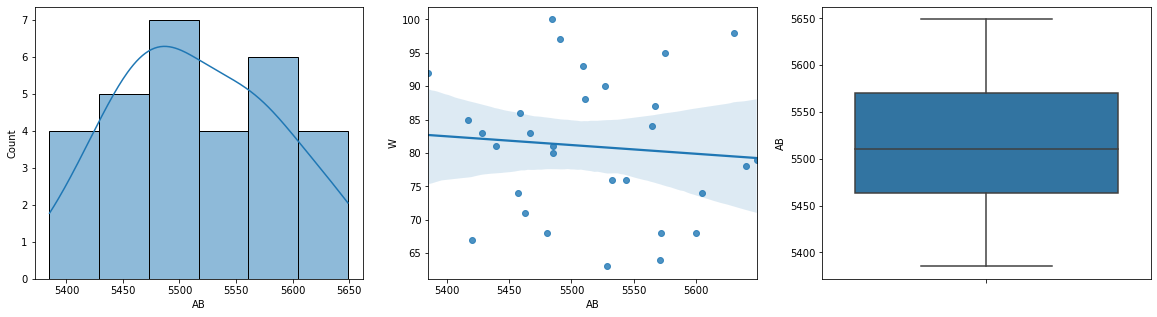

In [229]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='AB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='AB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='AB',data=df)

Observation- At Balls and Win is weak negative co-related and we can see a no outliers present and symetric distribution 

<AxesSubplot:ylabel='H'>

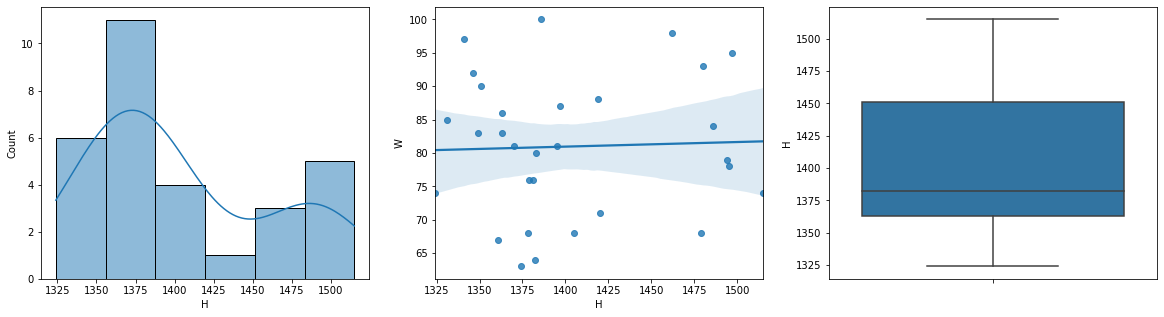

In [230]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='H',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='H',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='H',data=df)

Observation- Hits and Win is weak and slightly postively co-related and we can see a no outliers present and data is bimodal 

<AxesSubplot:ylabel='2B'>

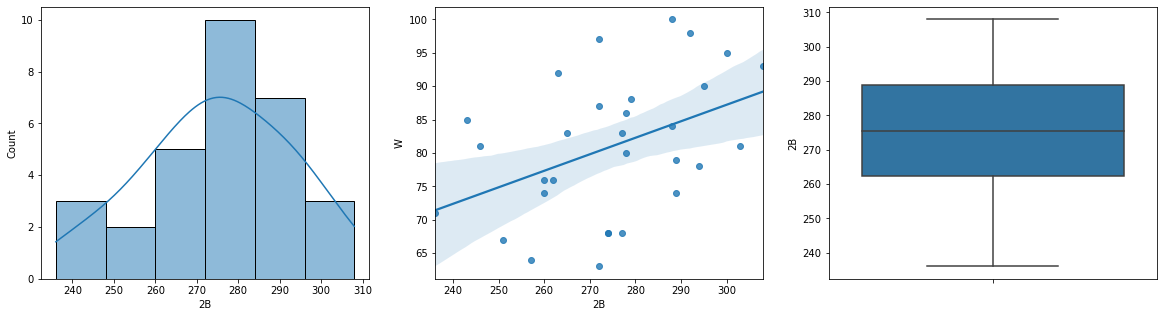

In [231]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='2B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='2B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='2B',data=df)

Observation- Doubles and Win is weak postively co-related and we can see a no outliers present and data is slightly left skewed 

<AxesSubplot:ylabel='3B'>

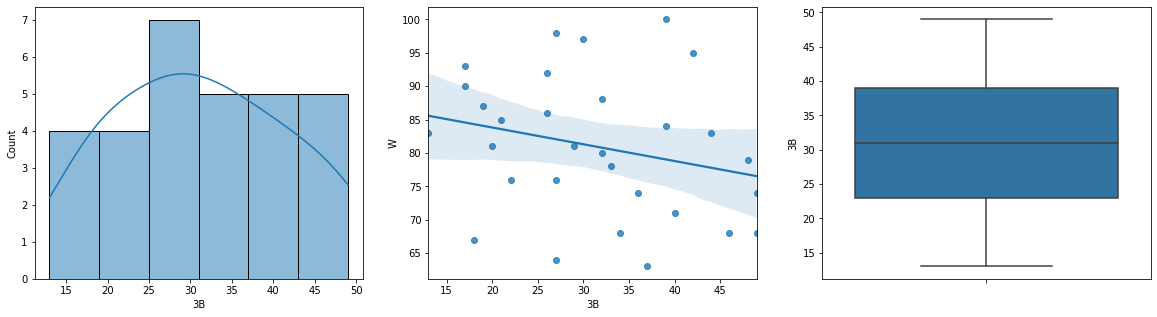

In [232]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='3B',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='3B',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='3B',data=df)

Observation- Triples and Win is weak negative co-related and we can see a no outliers present and data is slightly right skewed 

<AxesSubplot:ylabel='HR'>

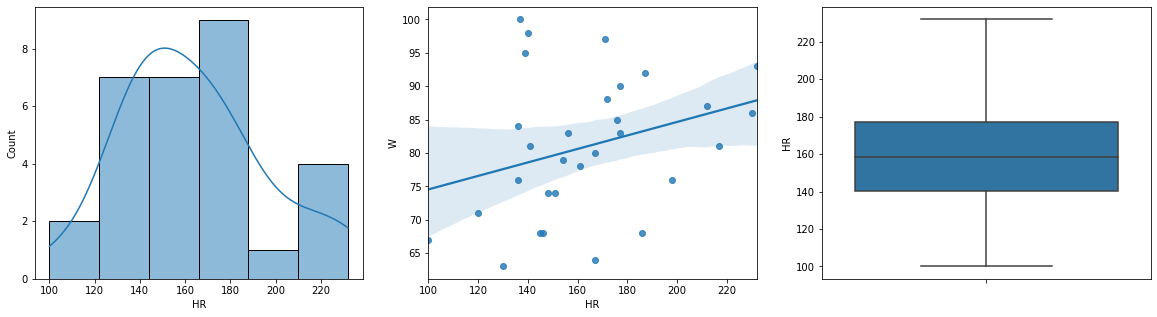

In [233]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='HR',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='HR',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='HR',data=df)

Observation- Homeruns and Win is weak positive co-related and we can see a no outliers present and data is right skewed 

<AxesSubplot:ylabel='BB'>

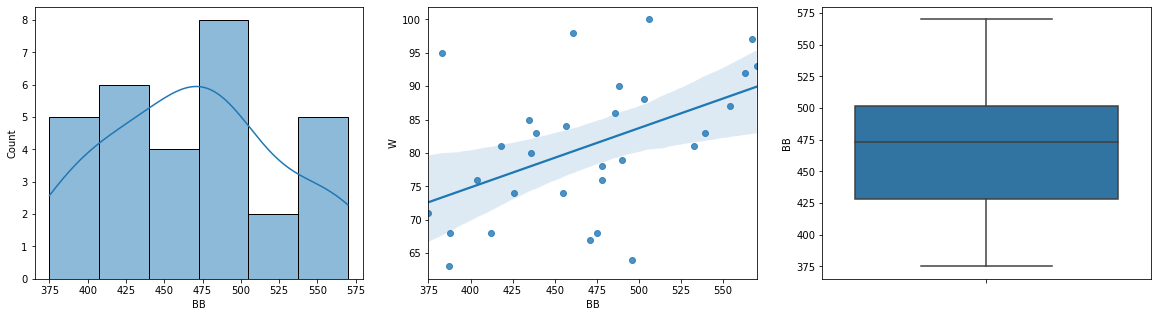

In [234]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='BB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='BB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='BB',data=df)

Observation- Walks and Win is weak positive co-related and we can see a no outliers present and data is left skewed 

<AxesSubplot:ylabel='SO'>

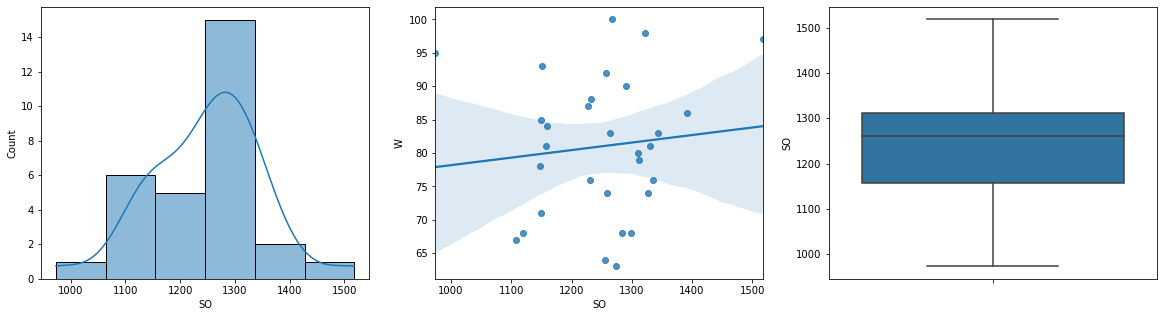

In [235]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SO',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SO',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SO',data=df)

Observation- Strike and Win is weak positive co-related and we can see a no outliers present and data is left skewed 

<AxesSubplot:ylabel='SB'>

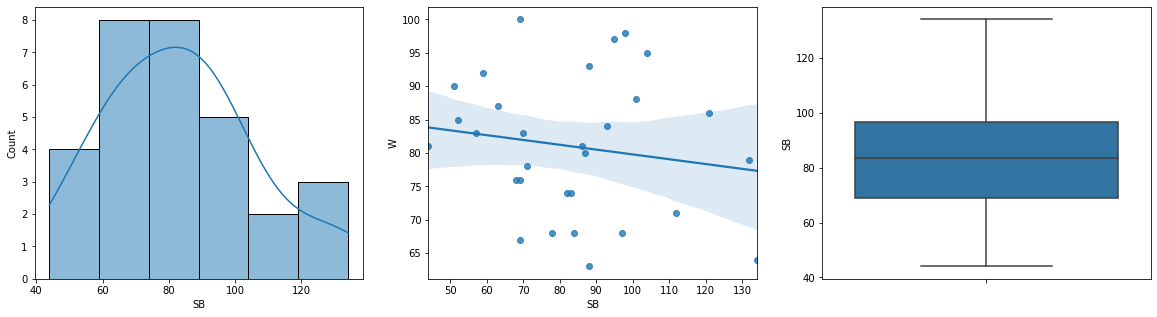

In [236]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SB',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SB',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SB',data=df)

Observation- Stolen bases and Win is weak negatve corelated and with no outliers and data is right-skewed

<AxesSubplot:ylabel='RA'>

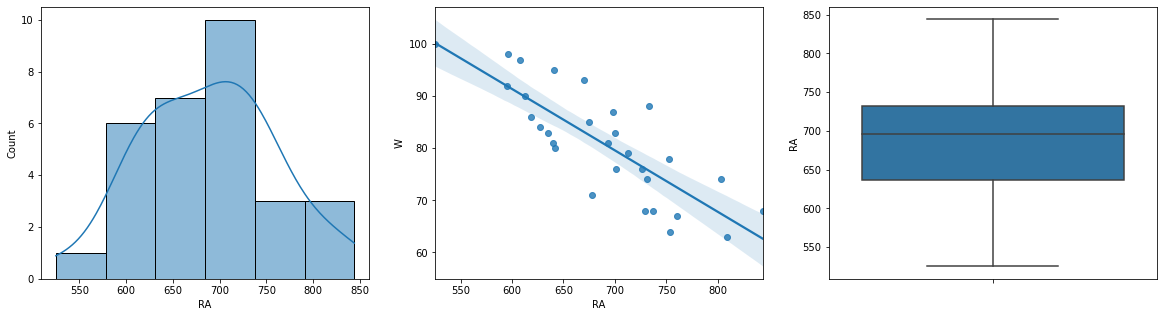

In [237]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='RA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='RA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='RA',data=df)

Observation- Runs allowed and Win is moderate negative correlated and with no outliers and data is left-skewed

<AxesSubplot:ylabel='ER'>

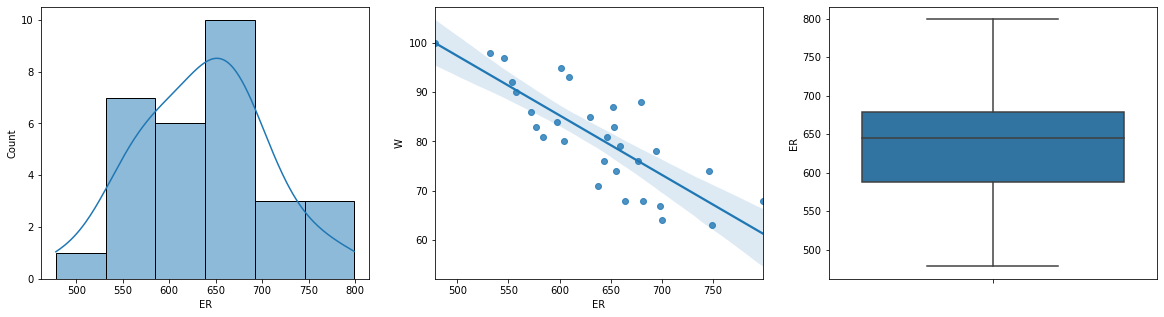

In [238]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ER',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ER',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ER',data=df)

Observation- Earned runs and Win is strong negative correlated and with no outliers and data is left-skewed

<AxesSubplot:ylabel='ERA'>

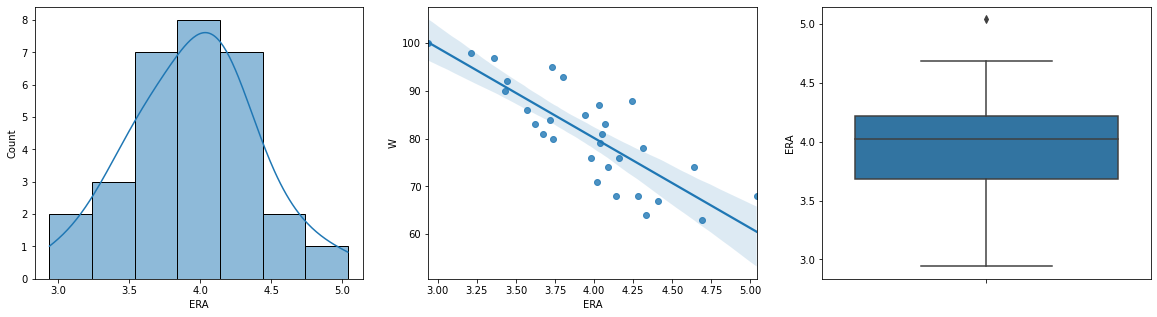

In [239]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='ERA',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='ERA',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='ERA',data=df)

Observation- Earned runs average and Win is strong negative correlated and with outliers present around 5 and data is left-skewed

<AxesSubplot:ylabel='SV'>

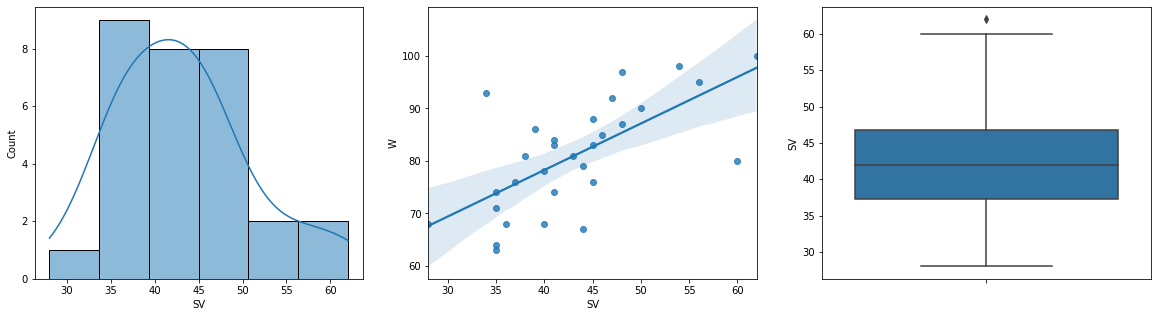

In [240]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='SV',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='SV',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='SV',data=df)

Observation- Saves and Win is strong negative correlated and with outliers present and data is right-skewed

<AxesSubplot:ylabel='E'>

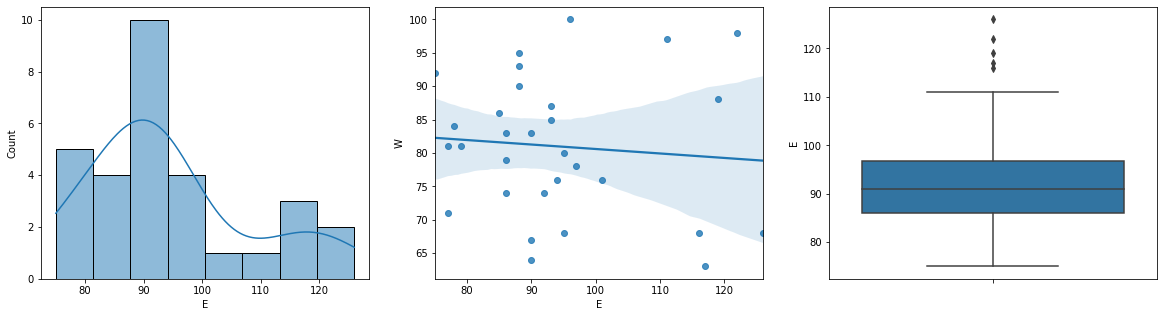

In [241]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(x='E',data=df,kde=True)
plt.subplot(1,3,2)
sns.regplot(x='E',y='W',data=df)
plt.subplot(1,3,3)
sns.boxplot(y='E',data=df)

Observation- Error and Win is slightly negative correlated and with lots of outliers and data is right-skewed

### Observations- As most of the datas are continious so I will do data transformation and scalling 

### Lets see the heatmap of correlation

<AxesSubplot:>

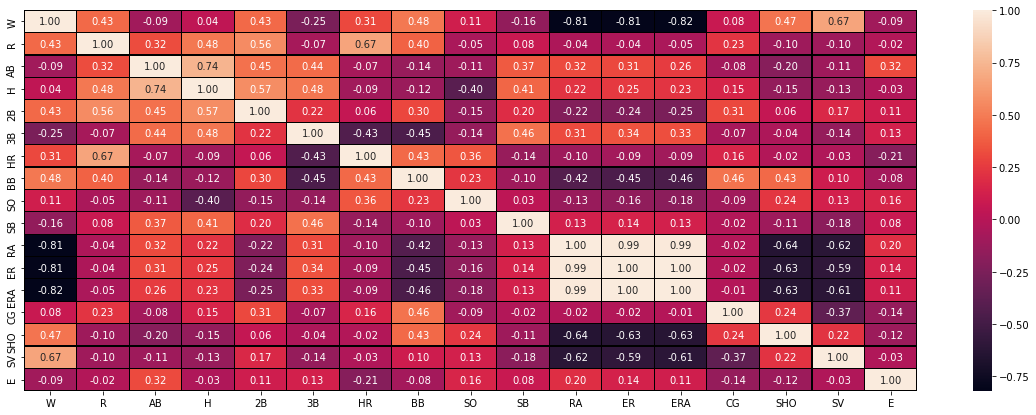

In [242]:
plt.figure(figsize=(20,7))
sns.heatmap(df.corr(),annot = True, linewidths = 0.1,linecolor="black",fmt= "0.2f")

In [243]:
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


# Lets do feature selection technique

In [244]:
X= df.drop("W",axis=1)
y=df["W"]

In [245]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.3,random_state=0)

In [246]:
X_train.shape, X_test.shape

((21, 16), (9, 16))

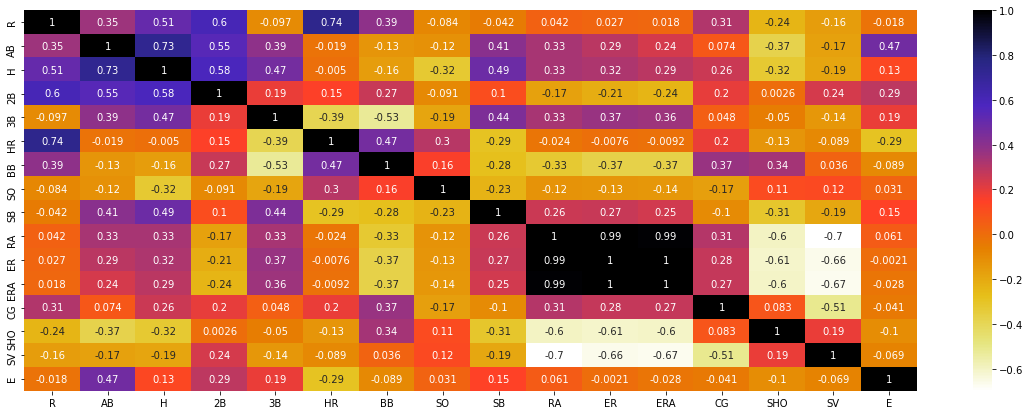

In [247]:
plt.figure(figsize=(20,7))
cor=X_train.corr()
sns.heatmap(cor,annot=True,cmap=plt.cm.CMRmap_r)
plt.show()

## Dropping the columns having 70% correlated

In [248]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [256]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

2

## Checking the columns having more than 70% correaltion and dropping them

In [257]:
corr_features

{'ER', 'ERA'}

In [ ]:
df=df.drop(corr_features,axis=1)


# Finding the unique value for all columns

In [259]:
for i in df:
    print(i , len(df[i].unique()))

W 24
R 28
AB 29
2B 22
3B 23
BB 29
SO 29
SB 27
RA 30
CG 9
SHO 12
SV 20
E 21


In [260]:
x= df.drop(columns ='W')
y=df["W"]

# Considering the Outlier removal

In [261]:
df.shape

(30, 13)

## Using Z Score method to remove outliers

In [262]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df))
threshold =3 
np.where(z>3)

(array([5], dtype=int64), array([1], dtype=int64))

In [263]:
df_new_z = df[(z<3).all(axis=1)]
df_new_z

,W,R,AB,2B,3B,BB,SO,SB,RA,CG,SHO,SV,E
0,95,724,5575,300,42,383,973,104,641,2,8,56,88
1,83,696,5467,277,44,439,1264,70,700,2,12,45,86
2,81,669,5439,303,29,533,1157,86,640,11,10,38,79
3,76,622,5533,260,27,404,1231,68,701,7,9,37,101
4,74,689,5605,289,49,455,1259,83,803,7,12,35,86
6,87,764,5567,272,19,554,1227,63,698,3,4,48,93
7,81,713,5485,246,20,418,1331,44,693,0,10,43,77
8,80,644,5485,278,32,436,1310,87,642,1,12,60,95
9,78,748,5640,294,33,478,1148,71,753,3,10,40,97
10,88,751,5511,279,32,503,1233,101,733,5,9,45,119


In [264]:
df_new_z.shape

(29, 13)

# Percentage of Loss of data:

In [265]:
data_loss = ((30-29)/30)*100

In [266]:
data_loss

3.3333333333333335

around 3.3% of Data has been loss. To remove skewness of so many columns I think it is good as only 3.5% data is loss

# Checking Skewness of Data

In [267]:
df_new_z.skew()

W      0.119013
R     -0.215364
AB     0.169573
2B    -0.335304
3B     0.090124
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

Observation- taking +0.5 to -0.5 as range for skewness

3B,RA,CG,E are skewed

# Checking VIF 

In [268]:
names = list(df_new_z.drop(columns=["W"]))

In [269]:


for index in range(0, len(names)):
            y = df_new_z.loc[:, df.columns == names[index]]
            x = df_new_z.loc[:, df.columns != names[index]]
            model = sm.OLS(y, x)                       #Fit ordinary least squares methodhttp://localhost:8888/notebooks/baseball%20predict.ipynb#
            results = model.fit()
            rsq = results.rsquared
            vif = round(1 / (1 - rsq), 2)
            print("R Square value of {} column is {} keeping all other columns as independent features".format(
              names [index], (round(rsq, 2))
                    )
            )
            print("Variance Inflation Factor of {} column is {} n".format(
                 names[index], vif)
          )


R Square value of R column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of R column is 778.27 n
R Square value of AB column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of AB column is 2245.45 n
R Square value of 2B column is 1.0 keeping all other columns as independent features
Variance Inflation Factor of 2B column is 747.61 n
R Square value of 3B column is 0.97 keeping all other columns as independent features
Variance Inflation Factor of 3B column is 30.19 n
R Square value of BB column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of BB column is 199.52 n
R Square value of SO column is 0.99 keeping all other columns as independent features
Variance Inflation Factor of SO column is 193.64 n
R Square value of SB column is 0.96 keeping all other columns as independent features
Variance Inflation Factor of SB column is 23.04 n
R Square value of RA column is 1.0 keeping all 

# Checking the normal distribution and heatmap to visualize the outliers

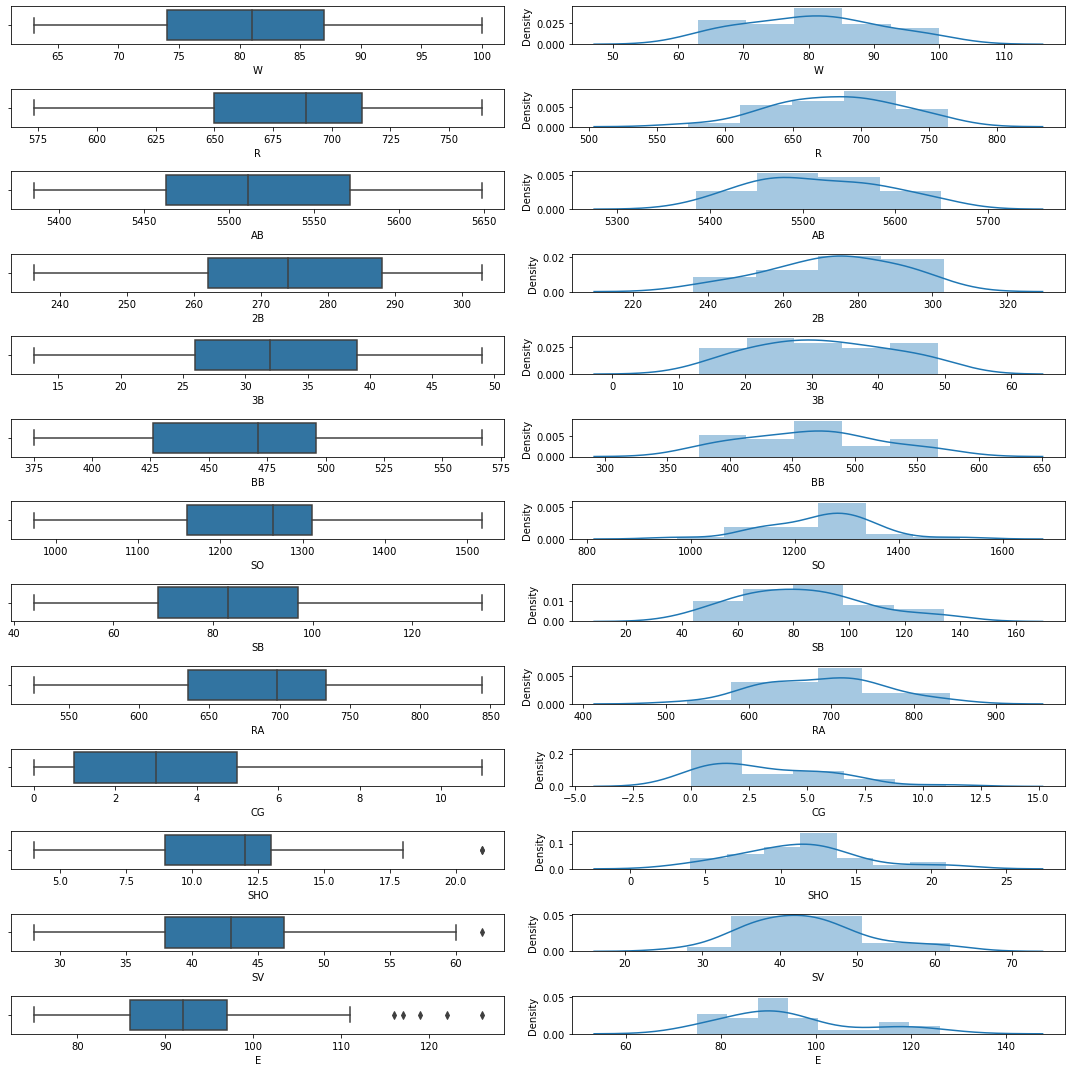

In [270]:
fig, ax = plt.subplots(13, 2, figsize = (15, 15))
sns.boxplot(x= df_new_z["W"], ax = ax[0,0])
sns.distplot(df_new_z['W'], ax = ax[0,1])
sns.boxplot(x= df_new_z["R"], ax = ax[1,0])
sns.distplot(df_new_z['R'], ax = ax[1,1])
sns.boxplot(x= df_new_z["AB"], ax = ax[2,0])
sns.distplot(df_new_z['AB'], ax = ax[2,1])
sns.boxplot(x= df_new_z["2B"], ax = ax[3,0])
sns.distplot(df_new_z['2B'], ax = ax[3,1])
sns.boxplot(x= df_new_z["3B"], ax = ax[4,0])
sns.distplot(df_new_z['3B'], ax = ax[4,1])
sns.boxplot(x= df_new_z["BB"], ax = ax[5,0])
sns.distplot(df_new_z['BB'], ax = ax[5,1])
sns.boxplot(x= df_new_z["SO"], ax = ax[6,0])
sns.distplot(df_new_z['SO'], ax = ax[6,1])
sns.boxplot(x= df_new_z["SB"], ax = ax[7,0])
sns.distplot(df_new_z['SB'], ax = ax[7,1])
sns.boxplot(x= df_new_z["RA"], ax = ax[8,0])
sns.distplot(df_new_z['RA'], ax = ax[8,1])
sns.boxplot(x= df_new_z["CG"], ax = ax[9,0])
sns.distplot(df_new_z['CG'], ax = ax[9,1])
sns.boxplot(x= df_new_z["SHO"], ax = ax[10,0])
sns.distplot(df_new_z['SHO'], ax = ax[10,1])
sns.boxplot(x= df_new_z["SV"], ax = ax[11,0])
sns.distplot(df_new_z['SV'], ax = ax[11,1])
sns.boxplot(x= df_new_z["E"], ax = ax[12,0])
sns.distplot(df_new_z['E'], ax = ax[12,1])
plt.tight_layout()

Observation- We can see in SHO,SV and E we still have outliers

# Histogram to check the features distribution

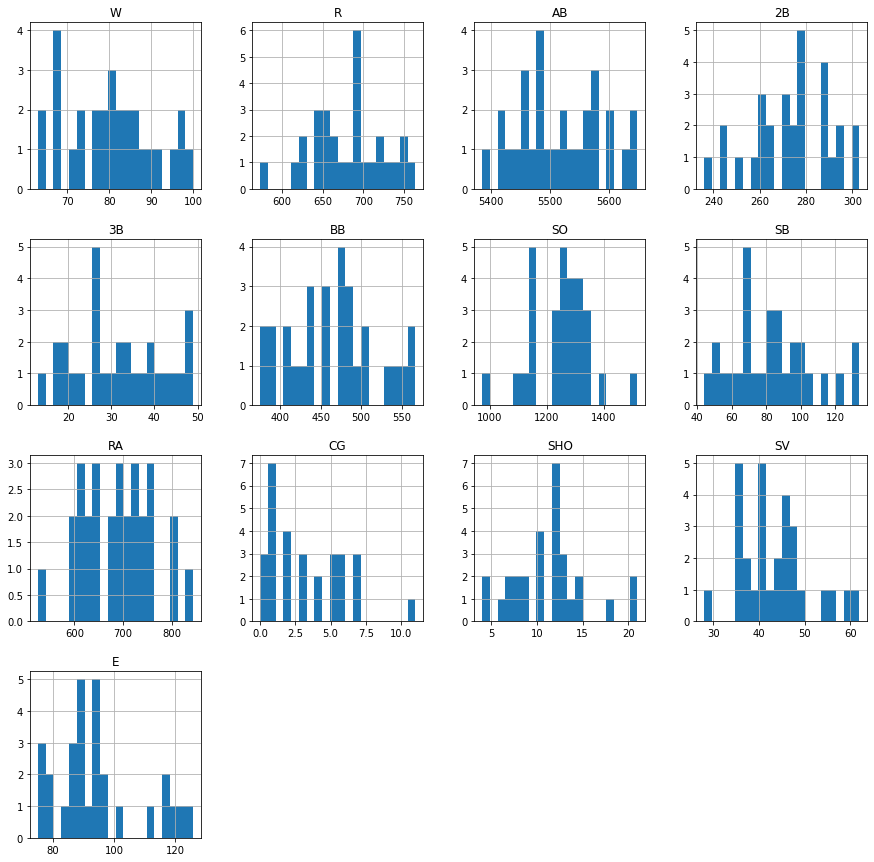

In [271]:
# Distributions of the variables/features.

df_new_z.hist(figsize=(15,15),bins=20)
plt.show()

# Applying ML Algorithms

In [297]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_new_z, test_size=0.30, random_state=2019)
train.shape, test.shape

((20, 13), (9, 13))

In [298]:
train_label = train['W']
test_label = test['W']

del train['W']
del test['W']

# Linear Regression

In [299]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(train, train_label)

LinearRegression()

In [300]:
from sklearn.metrics import mean_squared_error

predict_lr = linear_reg.predict(test)
mse = mean_squared_error(test_label, predict_lr)
lr_score = np.sqrt(mse)
lr_score

3.992734358079196

In [301]:
# Cross validation for linear regression

from sklearn.model_selection import cross_val_score

score = cross_val_score(linear_reg, train, train_label, cv=5, scoring='neg_mean_squared_error')
lr_score_cross = np.sqrt(-score)

np.mean(lr_score_cross), np.std(lr_score_cross)

(8.564780254350598, 2.845559928845788)

# Ridge Regression

In [302]:
from sklearn.linear_model import Ridge

r = Ridge(alpha=0.05, solver='cholesky')
r.fit(train, train_label)

predict_r = r.predict(test)
mse = mean_squared_error(test_label, predict_r)
r_score = np.sqrt(mse)
r_score

3.9922277133577384

In [303]:
# Cross validation Ridge
r = Ridge(alpha=0.05, solver='cholesky')
score = cross_val_score(r, train, train_label, cv=5, scoring='neg_mean_squared_error')
r_score_cross = np.sqrt(-score)
np.mean(r_score_cross), np.std(r_score_cross)

(8.562785715981592, 2.845106243783364)

# Lasso Regression

In [304]:
from sklearn.linear_model import Lasso

l = Lasso(alpha=0.01)
l.fit(train, train_label)

predict_l = l.predict(test)
mse = mean_squared_error(test_label, predict_l)
l_score = np.sqrt(mse)
l_score

3.991143603807811

In [305]:
# Cross validation Lasso

l = Lasso(alpha=0.01)
score = cross_val_score(l, train, train_label, cv=10, scoring='neg_mean_squared_error')
l_score_cross = np.sqrt(-score)
np.mean(l_score_cross), np.std(l_score_cross)

(8.519654473884412, 4.357641897966204)

# Decision Tree Regressor

In [322]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(train, train_label)

predict_r = dtr.predict(test)
mse = mean_squared_error(test_label, predict_r)
dtr_score = np.sqrt(mse)
dtr_score

10.132456102380443

In [323]:
# Cross validation Decision Tree

dtr = DecisionTreeRegressor()
score = cross_val_score(dtr, train, train_label, cv=5, scoring='neg_mean_squared_error')
dtr_score_cross = np.sqrt(-score)
np.mean(dtr_score_cross), np.std(dtr_score_cross)

(8.263854993148167, 2.551215524454986)

# Random Forest

In [308]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(train, train_label)
predict_rf = rf.predict(test)
mse = mean_squared_error(test_label, predict_rf)
rf_score = np.sqrt(mse)
rf_score

7.115548702196711

In [309]:
# Cross validation Random Forest

rf = RandomForestRegressor()
score = cross_val_score(rf, train, train_label, cv=5, scoring='neg_mean_squared_error')
rf_score_cross = np.sqrt(-score)
np.mean(rf_score_cross), np.std(rf_score_cross)

(6.475803486544086, 0.8178014451341162)

# Gradient Boosting

In [310]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()
gbr.fit(train, train_label)
predict_gbr = gbr.predict(test)
gb_score = mean_squared_error(test_label, predict_gbr)
gb_score = np.sqrt(gb_score)
gb_score

8.48619891629023

In [311]:
# Cross validation Gradient Boosting

gb = GradientBoostingRegressor()
score = cross_val_score(gb, train, train_label, cv=5, scoring='neg_mean_squared_error')
gb_score_cross = np.sqrt(-score)
np.mean(gb_score_cross), np.std(gb_score_cross)

(7.399911880739327, 2.0454099490845987)

# Lets visualize the actual vs predicted result

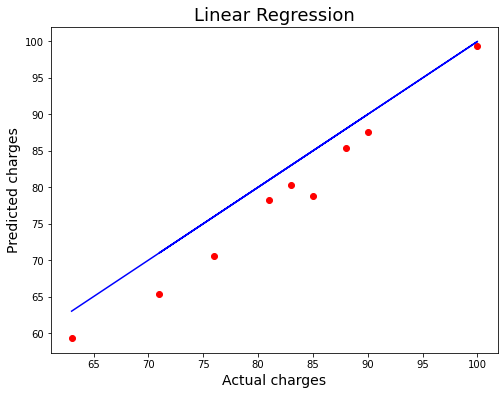

In [312]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_label,y=predict_lr,color='r')
plt.plot(test_label,test_label,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Linear Regression',fontsize= 18)
plt.show()

# Hyper Parameter tuning - Grid Search

### Gradient-boost-regressor tuning

In [382]:
from sklearn.model_selection import GridSearchCV

gb = GradientBoostingRegressor(max_depth=7, n_estimators=200, learning_rate=0.01)

param = [{'min_samples_split':[3,4,5,9,13], 'max_leaf_nodes':[3,5,6,7,8,9], 'max_features':[6,8,10,15,18]}]

gs = GridSearchCV(gb, param, cv=5, scoring='neg_mean_squared_error')
gs.fit(train, train_label)

GridSearchCV(cv=5,
             estimator=GradientBoostingRegressor(learning_rate=0.01,
                                                 max_depth=7,
                                                 n_estimators=200),
             param_grid=[{'max_features': [6, 8, 10, 15, 18],
                          'max_leaf_nodes': [3, 5, 6, 7, 8, 9],
                          'min_samples_split': [3, 4, 5, 9, 13]}],
             scoring='neg_mean_squared_error')

In [383]:
gb = gs.best_estimator_

In [384]:
total = pd.concat([train,test], axis=0, ignore_index=True)

total_label = pd.concat([train_label, test_label], axis=0, ignore_index=True)

total_label.shape, total.shape

((29,), (29, 12))

In [385]:
gb.fit(total, total_label)

GradientBoostingRegressor(learning_rate=0.01, max_depth=7, max_features=10,
                          max_leaf_nodes=7, min_samples_split=5,
                          n_estimators=200)

In [386]:
rsq=gb.fit(total, total_label)

In [387]:
predict = gb.predict(test)

predict

array([89.58313887, 80.63725075, 72.57992697, 84.49606767, 95.86631376,
       85.89069477, 82.69165769, 76.19899932, 66.83464104])

# Lets visualize the actual vs predicted result

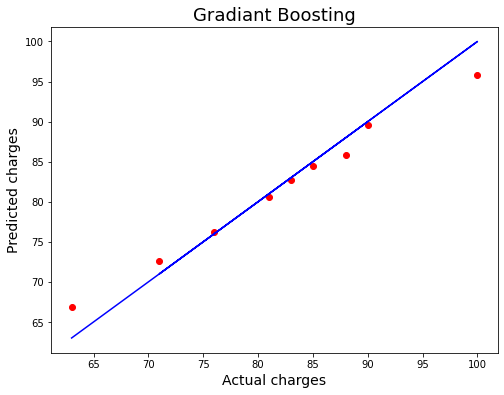

In [388]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(x=test_label,y=predict,color='r')
plt.plot(test_label,test_label,color='b')
plt.xlabel('Actual charges',fontsize= 14)
plt.ylabel('Predicted charges',fontsize= 14)
plt.title('Gradiant Boosting',fontsize= 18)
plt.show()

# Lets check the R2-Score

In [389]:
gfs = r2_score(test_label,predict)
print('R2 Score: ',gfs*100)

R2 Score:  95.86193565104739


R2 score is 95.8% which is good

# Saving the Model

In [391]:
import pickle
filename = 'Baseball_predict.pkl'
pickle.dump(gb,open(filename, 'wb'))